In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ch_stock_price = pd.read_csv('../data/raw/601988.SH.csv')
google_stock_price = pd.read_csv('../data/raw/Google_Stock_Price_Train.csv')

In [3]:
ch_stock_price.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,turnover_rate,volume_ratio,pe,pb,ps,total_share,float_share,free_share,total_mv,circ_mv
0,601988.SH,20070104,5.69,5.97,5.37,5.63,5.43,0.20,3.68,7281333.33,...,16.8115,1.67,34.1143,3.7772,9.8280,2.538392e+07,433117.0531,345454.7,1.429114e+08,2438449.009
1,601988.SH,20070105,5.30,5.34,5.07,5.07,5.63,-0.56,-9.95,7867306.84,...,15.1068,1.60,30.7210,3.4015,8.8504,2.538392e+07,520779.4000,345454.7,1.286965e+08,2640351.558
2,601988.SH,20070108,4.87,5.14,4.83,5.08,5.07,0.01,0.20,5565756.49,...,10.6874,0.97,30.7816,3.4082,8.8679,2.538392e+07,520779.4000,345454.7,1.289503e+08,2645559.352
3,601988.SH,20070109,5.06,5.19,4.95,5.18,5.08,0.10,1.97,4334458.33,...,8.3230,0.68,31.3875,3.4753,9.0424,2.538392e+07,520779.4000,345454.7,1.314887e+08,2697637.292
4,601988.SH,20070110,5.25,5.29,5.05,5.10,5.18,-0.08,-1.54,3721171.25,...,7.1454,0.59,30.9028,3.4217,8.9028,2.538392e+07,520779.4000,345454.7,1.294580e+08,2655974.940


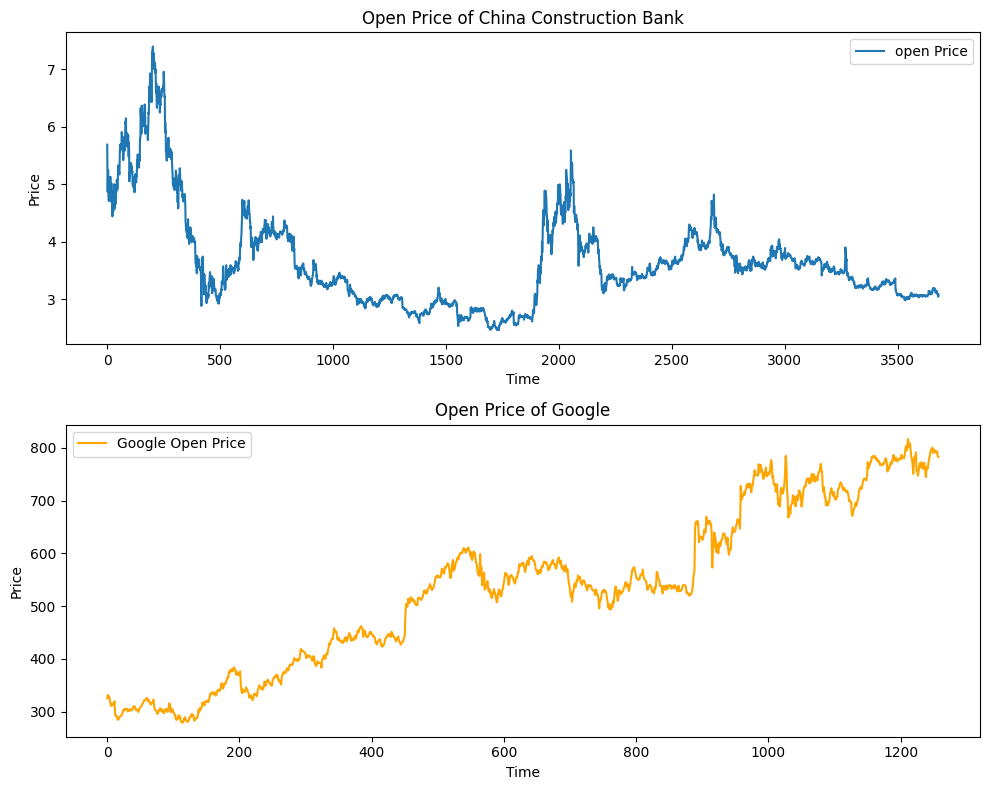

In [5]:
fig,ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ch_stock_price['open'], label='open Price')
ax[0].set_title('Open Price of China Construction Bank')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Price')
ax[0].legend()
ax[1].plot(google_stock_price['Open'], label='Google Open Price', color='orange')
ax[1].set_title('Open Price of Google')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Price')
ax[1].legend()
plt.tight_layout()
plt.show()

In [10]:
google_stock_price.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
ch_diff = np.diff(ch_stock_price['open'], n=1)
google_diff = np.diff(google_stock_price['Open'], n=1)
ch_logg_diff = np.log(ch_stock_price['open']).diff(1)
ch_logg_diff = ch_logg_diff.dropna(how='all')
google_logg_diff = np.log(google_stock_price['Open']).diff(1)
google_logg_diff = google_logg_diff.dropna(how='all')

### 差分処理後の時系列をグラフで表示

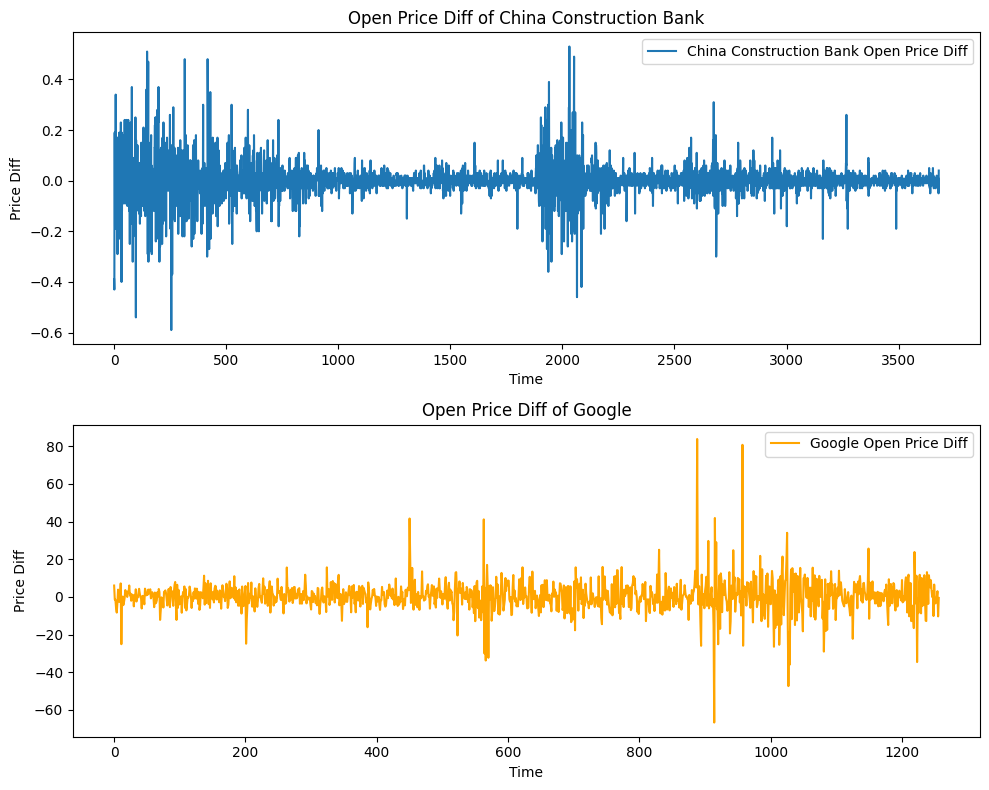

In [8]:
fig,ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ch_diff, label='China Construction Bank Open Price Diff')
ax[0].set_title('Open Price Diff of China Construction Bank')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Price Diff')
ax[0].legend()
ax[1].plot(google_diff, label='Google Open Price Diff', color='orange')
ax[1].set_title('Open Price Diff of Google')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Price Diff')
ax[1].legend()
plt.tight_layout()
plt.show()

### ADF検定による定常性確認

ADF検定は単位根検定の一つで、時系列データが定常過程であるかどうかを検定するのに使用します。
p値が有意水準以下であればデータが定常であると判断します。
有意水準は0.05未満であれば帰無仮説を棄却することができ、定常系列であると判断できます。

In [11]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ch_stock_price['open'])
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print(f'usedlag: {usedlag}')
print(f'nobs: {nobs}')
print(f'Critical Values 1%: {critical_values["1%"]}')
print(f'Critical Values 5%: {critical_values["5%"]}')
print(f'Critical Values 10%: {critical_values["10%"]}')
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ch_diff)
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print(f'usedlag: {usedlag}')
print(f'nobs: {nobs}')
print(f'Critical Values 1%: {critical_values["1%"]}')
print(f'Critical Values 5%: {critical_values["5%"]}')
print(f'Critical Values 10%: {critical_values["10%"]}')


ADF Statistic: -2.4785470954805904
p-value: 0.12078167977828946
usedlag: 20
nobs: 3660
Critical Values 1%: -3.432137948707262
Critical Values 5%: -2.8623300163441647
Critical Values 10%: -2.5671905375645734
ADF Statistic: -12.861434023634764
p-value: 5.1004721432341495e-24
usedlag: 19
nobs: 3660
Critical Values 1%: -3.432137948707262
Critical Values 5%: -2.8623300163441647
Critical Values 10%: -2.5671905375645734


In [12]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(google_stock_price['Open'])
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print(f'usedlag: {usedlag}')
print(f'nobs: {nobs}')
print(f'Critical Values 1%: {critical_values["1%"]}')
print(f'Critical Values 5%: {critical_values["5%"]}')
print(f'Critical Values 10%: {critical_values["10%"]}')
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(google_diff)
print(f'ADF Statistic: {adf}')
print(f'p-value: {pvalue}')
print(f'usedlag: {usedlag}')
print(f'nobs: {nobs}')
print(f'Critical Values 1%: {critical_values["1%"]}')
print(f'Critical Values 5%: {critical_values["5%"]}')
print(f'Critical Values 10%: {critical_values["10%"]}')

ADF Statistic: -0.7762114964086173
p-value: 0.8260100940100732
usedlag: 0
nobs: 1257
Critical Values 1%: -3.4355629707955395
Critical Values 5%: -2.863842063387667
Critical Values 10%: -2.567995644141416
ADF Statistic: -17.61156185063485
p-value: 3.8773441829274624e-30
usedlag: 4
nobs: 1252
Critical Values 1%: -3.4355838322867998
Critical Values 5%: -2.863851267837805
Critical Values 10%: -2.5680005460145554
